### Context
    Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

### Content
    Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance

### Problem Statemnet: Predict the price of insurance based on the given details.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df['sex']=df['sex'].map({"female":0,"male":1})

In [7]:
df['region']=df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df['smoker']=df['smoker'].map({"no":0,"yes":1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


<AxesSubplot:>

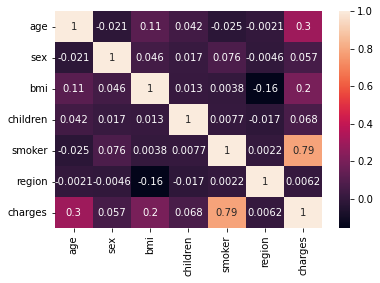

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


# Machine Learning

In [11]:
# split into dependent and independent  feature
x=df[df.columns[0:-1]]

In [12]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [13]:
y=df['charges']

In [14]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [15]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [16]:
#split the data in train and test datasets
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=18)

In [18]:
x_train.shape

(936, 6)

In [19]:
x_test.shape

(402, 6)

In [20]:
y_train.shape

(936,)

In [21]:
y_test.shape

(402,)

In [22]:
# Now scale the data 
from sklearn.preprocessing import StandardScaler

In [23]:
ss=StandardScaler()

In [24]:
x_train=ss.fit_transform(x_train)

In [25]:
x_test=ss.transform(x_test)

In [26]:
x_train

array([[ 1.16960715,  0.98726063,  0.5817846 , -0.90697062, -0.48795004,
        -0.41164248],
       [-0.11757955, -1.01290376,  1.51289177, -0.90697062, -0.48795004,
        -0.41164248],
       [ 0.16846193, -1.01290376, -1.21857299, -0.90697062,  2.04939015,
         1.38461561],
       ...,
       [ 0.74054491,  0.98726063,  0.23506112,  0.74946743, -0.48795004,
        -1.30977153],
       [ 0.5260138 , -1.01290376, -0.69279044,  0.74946743, -0.48795004,
         1.38461561],
       [ 1.59866938,  0.98726063,  1.29802089, -0.90697062, -0.48795004,
        -0.41164248]])

In [27]:
x_test

array([[ 1.09809677,  0.98726063, -0.02783016, -0.90697062,  2.04939015,
         1.38461561],
       [-0.33211067,  0.98726063,  0.94641398, -0.0787516 ,  2.04939015,
         1.38461561],
       [ 0.38299305, -1.01290376, -0.36722849,  0.74946743, -0.48795004,
        -0.41164248],
       ...,
       [-0.04606918, -1.01290376, -1.07939525,  3.23412451, -0.48795004,
         0.48648657],
       [ 0.66903454,  0.98726063, -0.35095039, -0.0787516 , -0.48795004,
        -1.30977153],
       [-0.18908993, -1.01290376, -0.00911034,  0.74946743, -0.48795004,
        -0.41164248]])

In [28]:
# training the model

from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.intercept_

13077.88500392094

In [32]:
lr.coef_

array([3513.54948692,   23.10643299, 1751.51613431,  652.67113529,
       9316.89031258,  349.83745628])

In [33]:
reg_pred=lr.predict(x_test)

In [34]:
reg_pred

array([ 3.58965496e+04,  3.31184039e+04,  9.55590966e+03,  3.14961288e+04,
        3.84254866e+04,  4.04309551e+03,  3.14978932e+04,  1.34060157e+04,
        3.49653028e+04,  3.12343826e+04,  1.31570793e+03,  3.18319352e+04,
        3.55550373e+04,  3.38640007e+03,  1.48230922e+04,  1.20240874e+04,
        1.25075368e+04,  2.35805688e+04,  7.90335826e+03,  2.81942379e+04,
        3.52365574e+04,  8.89494532e+03,  3.18086614e+03,  4.70170770e+03,
        2.00363977e+02,  3.00884418e+03,  2.67987191e+04,  5.11167542e+03,
        4.78888212e+03,  2.62668008e+04,  3.00784744e+04,  3.32664843e+02,
        4.21618351e+03,  2.46191797e+03,  2.71634537e+04,  1.71349920e+03,
        1.57569379e+04,  1.20937254e+04,  3.03248247e+04,  2.85395322e+03,
        4.45080782e+03,  3.49497004e+04,  4.21689420e+03,  3.37745534e+04,
        8.11767237e+03,  4.94963244e+03,  3.75336800e+04,  3.33124387e+04,
        9.56686769e+03, -8.34817022e+02,  1.07412256e+04,  3.08827718e+04,
        4.24835236e+03,  

In [35]:
pd.DataFrame(np.c_[y_test,reg_pred],columns=['True_value','Predicted_value'])

,True_value,Predicted_value
0,42303.69215,35896.549589
1,39774.27630,33118.403929
2,8516.82900,9555.909662
3,39611.75770,31496.128791
4,47291.05500,38425.486577
...,...,...
397,8059.67910,9180.047553
398,3947.41310,5277.533670
399,8965.79575,8736.869831
400,8703.45600,9780.904769


In [36]:
residual=y_test-reg_pred

In [37]:
residual

381    6407.142561
38     6655.872371
197   -1039.080662
14     8115.628909
94     8865.568423
          ...     
54    -1120.368453
76    -1330.120570
937     228.925919
666   -1077.448769
43    -1859.358517
Name: charges, Length: 402, dtype: float64

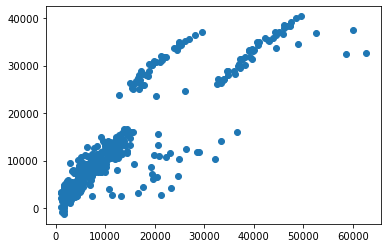

In [38]:
plt.scatter(y_test,reg_pred)

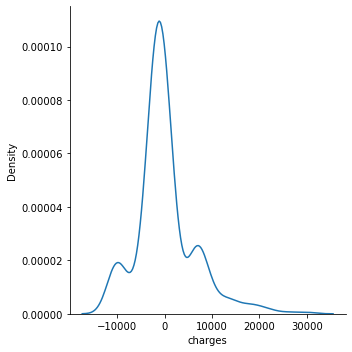

In [39]:
sns.displot(residual,kind='kde')

In [40]:
# accuracy check
from sklearn.metrics import r2_score

In [41]:
score=r2_score(y_test,reg_pred)

In [42]:
score

0.7675694401316939

In [43]:
# save the model
import joblib

In [44]:
joblib.dump(lr,'Insurance_cost_prediction.pkl')

['Insurance_cost_prediction.pkl']

In [45]:
#load the model
ranjeet=joblib.load('Insurance_cost_prediction.pkl')

In [46]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,1,16884.924


In [47]:
ranjeet.predict(ss.transform([[28,1,21.5,0,0,1]]))[0]

C:\Users\RANJEET\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1911.1730209930338

In [48]:
list=[]
a=float(input("Enter the age:"))
list.append(a)
b=float(input("Enter the sex(male=1/female=0):"))
list.append(b)
c=float(input("Enter the bmi:"))
list.append(c)
d=float(input("Enter the children:"))
list.append(d)
e=float(input("Enter the smoker(yes=1/no=0):"))
list.append(e)
f=float(input("Enter the region(1,2,3,4):"))
list.append(f)

Predicted_value=ranjeet.predict(ss.transform([list]))[0]
print(f'The person can get the insurance in {Predicted_value}')

Enter the age:45
Enter the sex(male=1/female=0):1
Enter the bmi:22
Enter the children:5
Enter the smoker(yes=1/no=0):0
Enter the region(1,2,3,4):4
The person can get the insurance in 9970.439520986027


C:\Users\RANJEET\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
